In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv('../data/house_prices.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df.head(10)

Primeras filas del dataset:


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [5]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [6]:
# Estadísticas descriptivas iniciales
print("\nEstadísticas descriptivas iniciales:")
df.describe()


Estadísticas descriptivas iniciales:


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [8]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [9]:
# Verificacion de tipo de datos
df.dtypes

Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [11]:
columnas_categoricas = ['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}':")
    print(df[columna].unique())
    print("\n")

Valores únicos en 'Home':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128]


Valores únicos en 'Price':
[114300 114200 114800  94700 119800 114600 151600 150700 119200 104000
 132500 123000 102600 126300 176800 145800 147100  83600 111400 167200
 116200 113800  91700 106100 156400 149300 137000  99300  69100 188000
 182000 112300 135000 139600 117800 117100 117500 147000 131300 108200
 106600 133600 105600 154000 166500 103200 129800  90300 115900 107500
 151100  91100 117400 130800  81300 125700 140900 152300 138100 15540

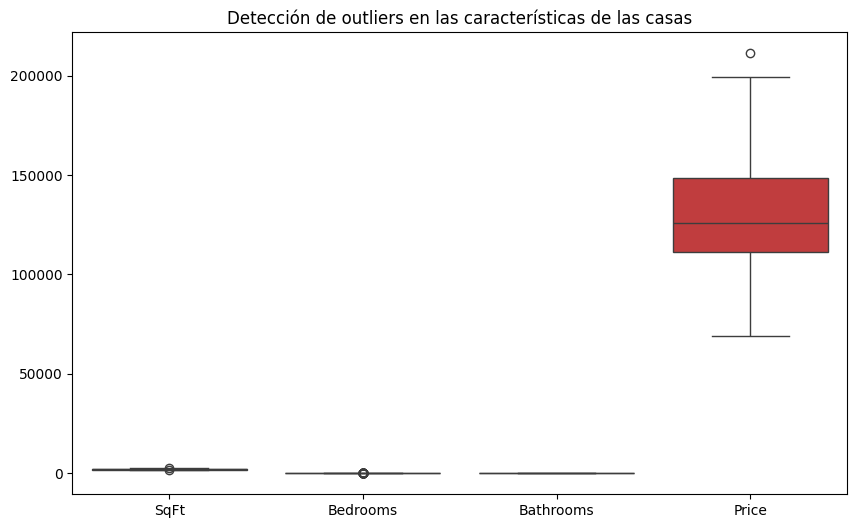

In [17]:
# Crear un boxplot para múltiples columnas en un solo gráfico
plt.figure(figsize=(10, 6))

# Boxplot para todas las características
sns.boxplot(data=df[['SqFt', 'Bedrooms', 'Bathrooms', 'Price']])
plt.title('Detección de outliers en las características de las casas')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# Definir características (X) y etiquetas (y)
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

# Características de la casa para predecir el precio
new_house = [[2000, 3, 2]]

# Realizar la predicción
predicted_price = model.predict(new_house)
print(f'El precio predicho para la casa es: ${predicted_price[0]:,.2f}')



MSE: 320149938.2302681
R²: 0.4568195777548879
El precio predicho para la casa es: $123,537.00


c:\Users\Belen Lugo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
